# Code v3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
ruta_csv = "/content/nutec_clean_dataset_v3.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
# Limpieza rápida: imputación de datos faltantes
df.fillna(df.median(numeric_only=True), inplace=True)

In [3]:
# Variables categóricas (si existen, imputación simple)
#for column in df.select_dtypes(include=['object']).columns:
#    df[column].fillna(df[column].mode()[0], inplace=True)

# Assuming 'df' is your DataFrame

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the mappings for each column
categorical_mappings = {}

# Iterate through each categorical column
for col in categorical_cols:
    # Get unique values in the column
    unique_values = df[col].unique()

    # Create a mapping dictionary for the column
    mapping = {value: i for i, value in enumerate(unique_values)}

    # Store the mapping in the main dictionary
    categorical_mappings[col] = mapping

    # Apply the mapping to the column in the DataFrame
    df[col] = df[col].map(mapping)

print(categorical_mappings)
# Now, your categorical columns are converted to numerical using assigned numbers.

{'Order Num': {'16-2837': 0, '16-2864-1': 1, '16-2864-2': 2, '22-3206C': 3, '22-3206C-1': 4, '23-3281-1': 5, '23-3281-2': 6, '23-3281-3': 7, '23-3283': 8, '23-3283-1': 9, '14-2764': 10, '15-2790': 11, '15-2790-1': 12, '15-2790-2': 13, '15-2790-3': 14, '15-2814': 15, '15-2814-1': 16, '15-2814-2': 17, '15-2815': 18, '16-2845-1': 19, '16-2845-2': 20, '16-2851': 21, '16-2851-1': 22, '21-3150': 23, '16-2856': 24, '19-3050-B': 25, '19-3050-A': 26, '22-3206A': 27, '16-2878-1': 28, '16-2878-2': 29, '16-2878-3': 30, '16-2871': 31, '14-2701AB': 32, '20-3083': 33}, 'Empty or loaded for TUS': {'Loaded': 0, 'Empty': 1, 'Empty with heat sinks': 2, 'Empty heat up load test': 3}, 'Tipo de Horno': {'Recirculacion': 0, 'Fuego directo': 1}, 'Posicion del termopar de control con respecto a la carga u horno': {nan: 0, 'Pared lateral': 1, 'Pared trasera': 2, 'Pared Lateral, parte media de la carga': 3, 'Pared Lateral, parte baja de la carga': 4, 'Pared Lateral, parte alta de la carga': 5}, 'Posicion del ter

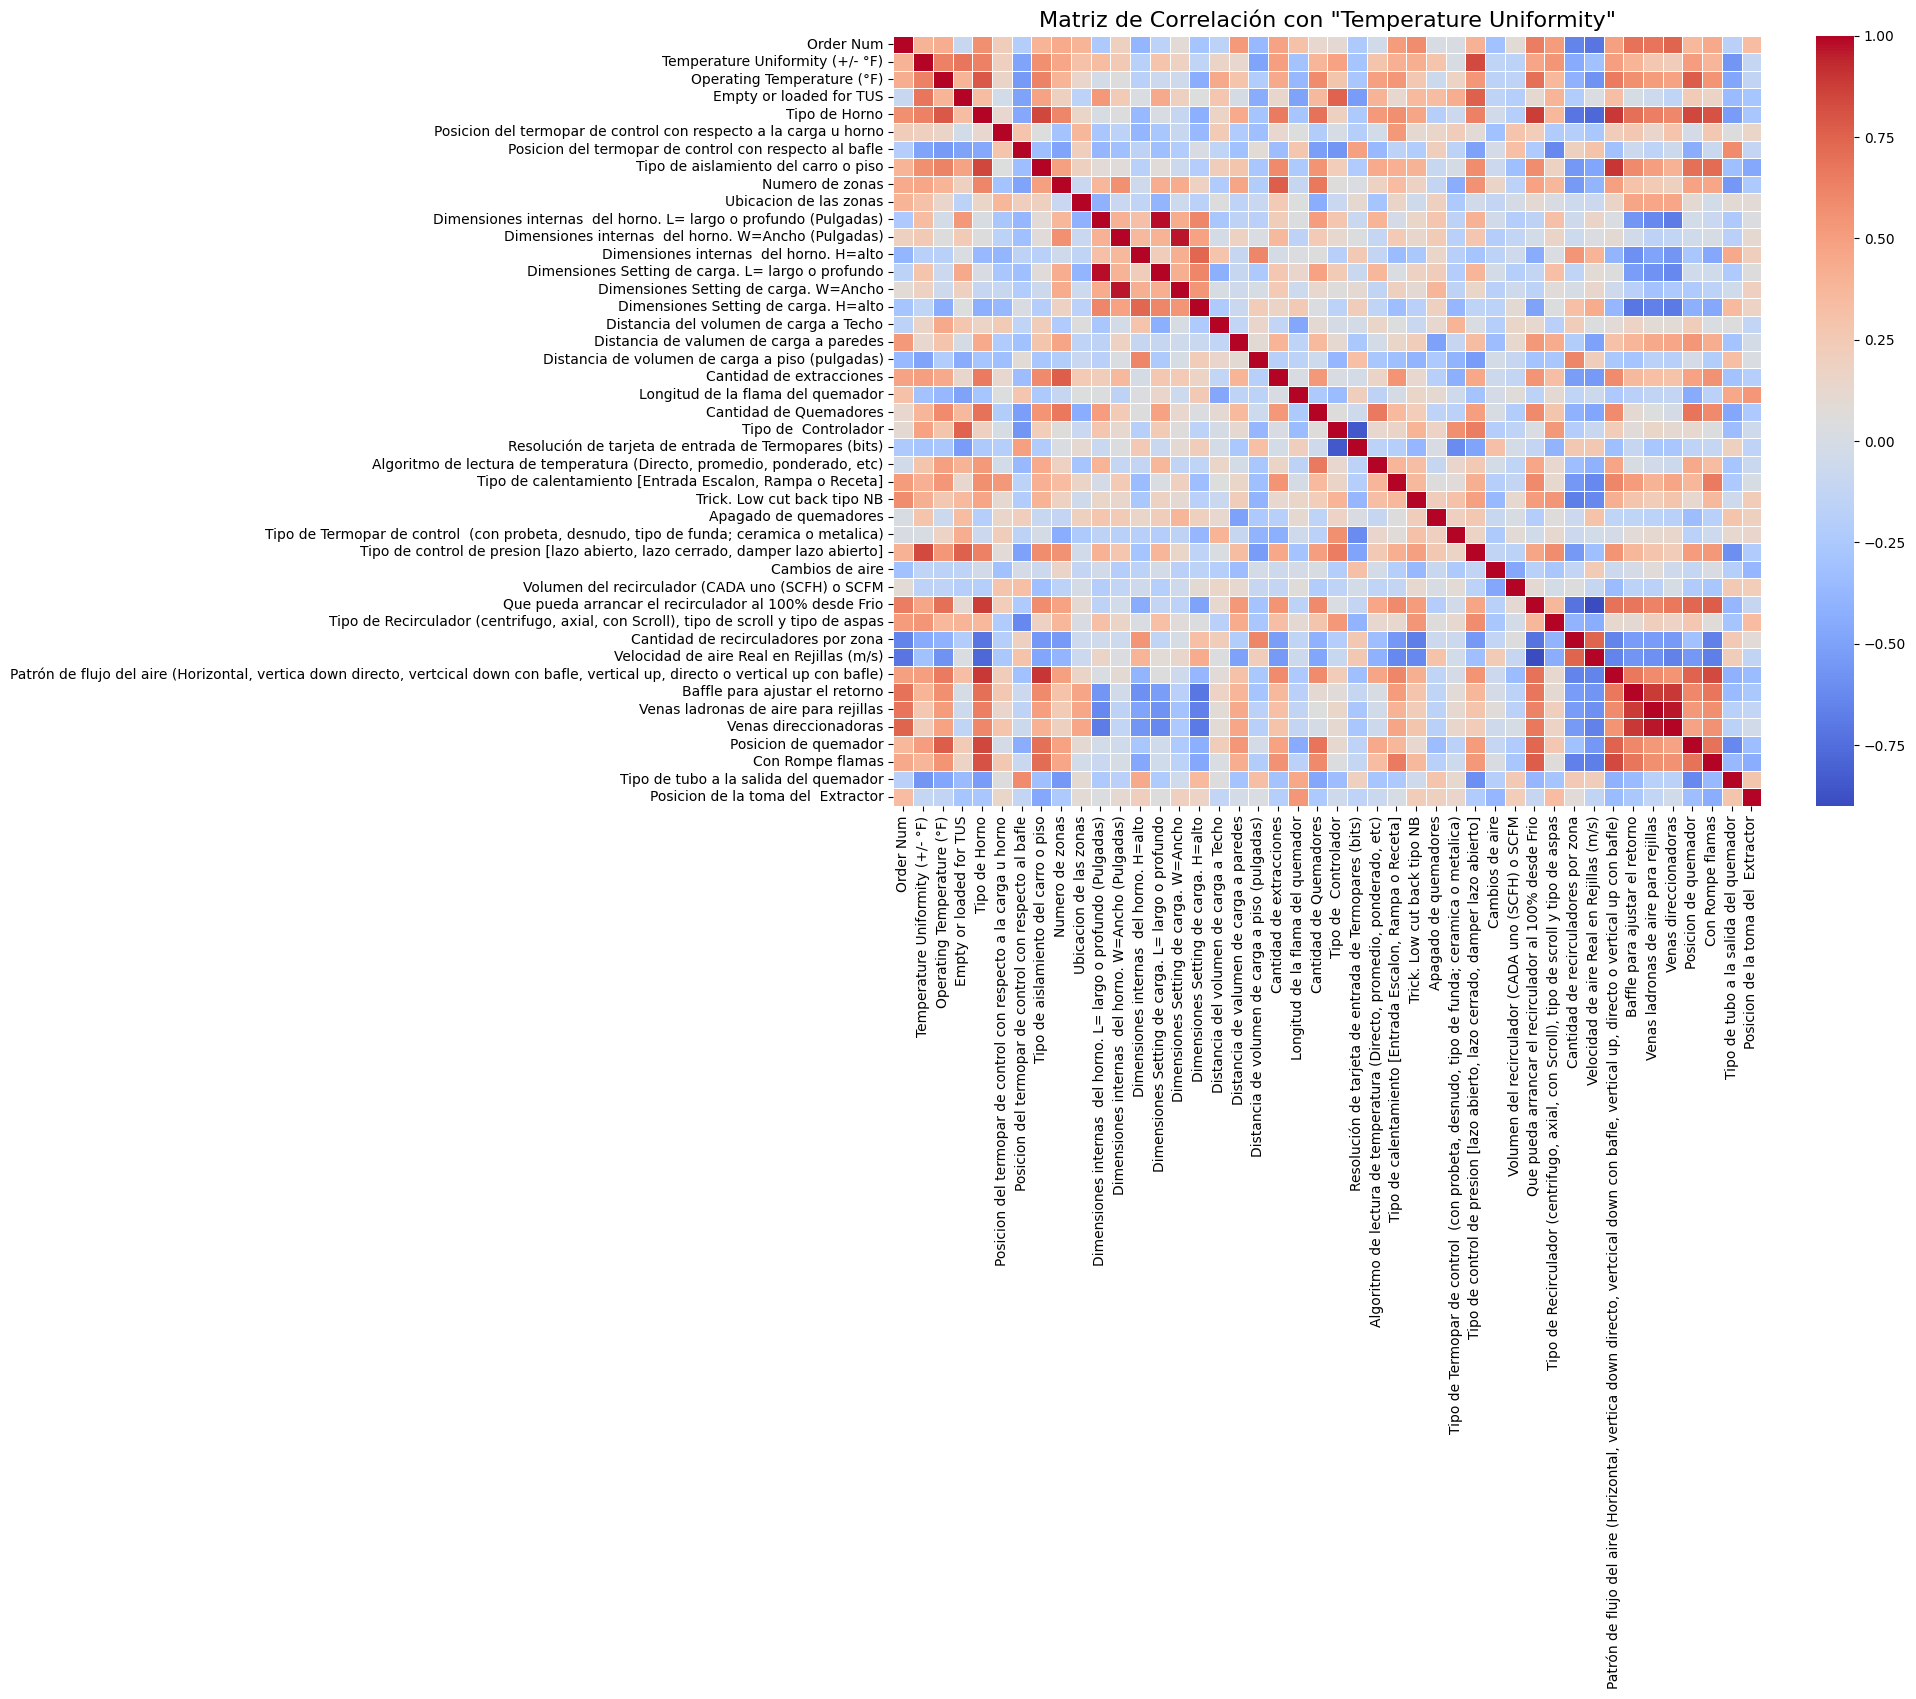

In [4]:
# Paso clave: Matriz de correlación, solo para columnas numéricas
# Se excluyen las columnas que no son numéricas usando select_dtypes
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Visualización gráfica: Matriz de correlación
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación con \"Temperature Uniformity\"', fontsize=16)
plt.show()

Correlación con Temperature Uniformity:
Tipo de tubo a la salida del quemador                                                                                                 -0.564771
Distancia de volumen de carga a piso (pulgadas)                                                                                       -0.488028
Posicion del termopar de control con respecto al bafle                                                                                -0.487121
Cantidad de recirculadores por zona                                                                                                   -0.454123
Velocidad de aire Real en Rejillas (m/s)                                                                                              -0.311121
Longitud de la flama del quemador                                                                                                     -0.301808
Resolución de tarjeta de entrada de Termopares (bits)                                           

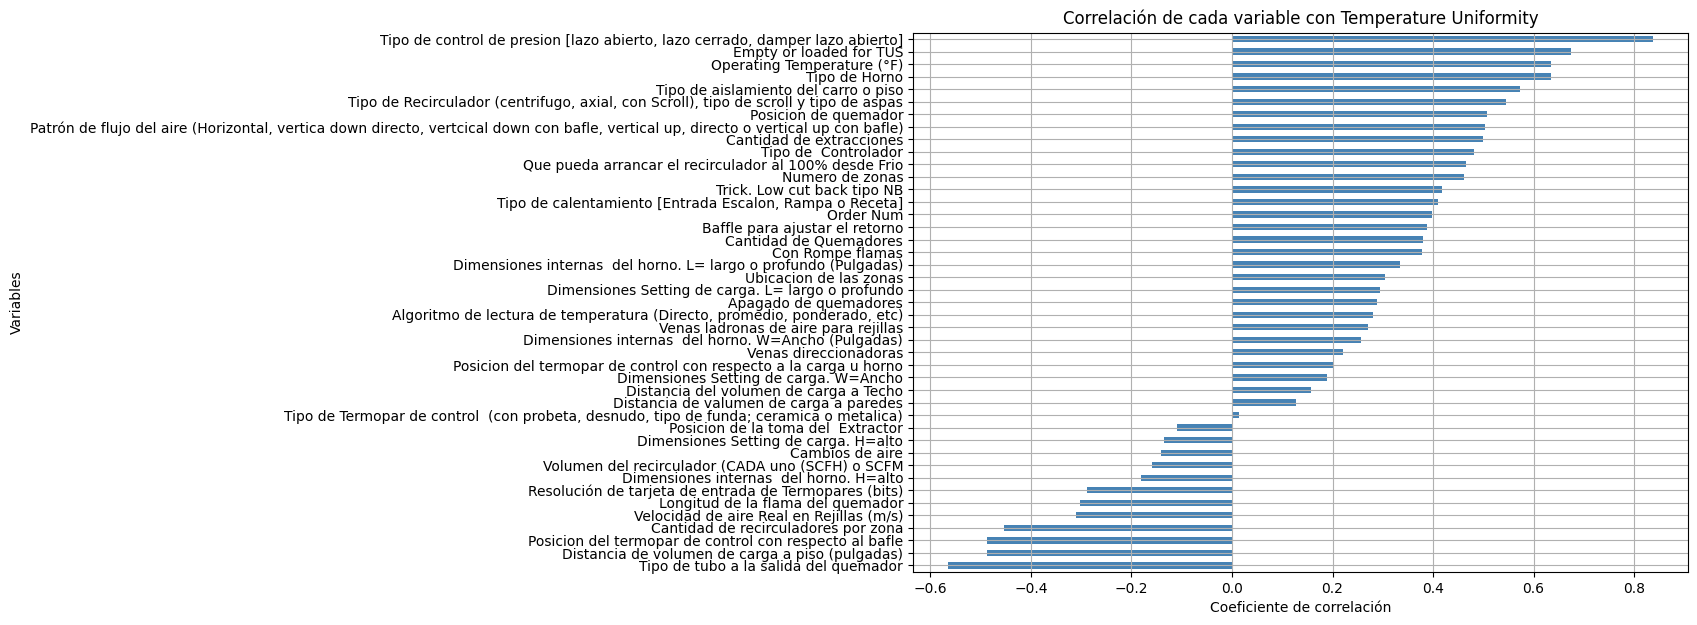

In [5]:
# Correlaciones específicas con la variable objetivo
# Asegúrate de que 'Temperature Uniformity' sea una columna numérica
target_variable_name = 'Temperature Uniformity (+/- °F)'
target_corr = None
if target_variable_name in numeric_df.columns:
    target_corr = correlation_matrix[target_variable_name].sort_values()
    print("Correlación con Temperature Uniformity:")
    print(target_corr)

    # Gráfica para ver correlaciones claramente
    target_corr.drop(target_variable_name).plot(kind='barh', figsize=(10,7), color='steelblue')
    plt.xlabel('Coeficiente de correlación')
    plt.ylabel('Variables')
    plt.title('Correlación de cada variable con Temperature Uniformity')
    plt.grid(True)
    plt.show()
else:
    print("La columna 'Temperature Uniformity' no es numérica o no está presente en el DataFrame.")

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('/content/nutec_clean_dataset_v3.csv', encoding='ISO-8859-1')


correlation_threshold = 0.5  # 0.4
nunique_threshold_for_categorical = 10

correlations_predictors = target_corr.drop(target_variable_name, errors='ignore')
highly_correlated_features_series = correlations_predictors[abs(correlations_predictors) > correlation_threshold]
selected_predictor_names = highly_correlated_features_series.index.tolist()

print(f"\nPredictores seleccionados automáticamente (correlación absoluta > {correlation_threshold}):")
if not selected_predictor_names:
    print("  Ningún predictor cumple el criterio de correlación.")
else:
    for name, corr_value in highly_correlated_features_series.items():
        print(f"- '{name}' (Correlación: {corr_value:.4f})")

relevant_columns_auto = [target_variable_name] + selected_predictor_names
relevant_columns_auto = [col for col in relevant_columns_auto if col in df.columns]

categorical_cols = []
numerical_cols = []
print("\nClasificación de predictores seleccionados (categóricos/numéricos):")
for col_name in selected_predictor_names:
    if df[col_name].nunique() <= nunique_threshold_for_categorical:
        categorical_cols.append(col_name)
        print(f"  - '{col_name}' (Numérica, {df[col_name].nunique()} únicos) -> Categórica (por heurística)")
    else:
        numerical_cols.append(col_name)
        print(f"  - '{col_name}' (Numérica, {df[col_name].nunique()} únicos) -> Numérica")

print("\nColumnas categóricas seleccionadas automáticamente (predictores):")
if categorical_cols:
    print(categorical_cols)
else:
    print("  Ninguna columna categórica seleccionada.")

print("\nColumnas numéricas seleccionadas automáticamente (predictores):")
if numerical_cols:
    print(numerical_cols)
else:
    print("  Ninguna columna numérica seleccionada.")

df = df[relevant_columns_auto].copy()


for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.lower() # Example cleaning

for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

df = pd.get_dummies(df, columns=categorical_cols, dummy_na=True)

df[target_variable_name] = pd.to_numeric(df[target_variable_name], errors='coerce')
df.dropna(subset=[target_variable_name], inplace=True)

X = df.drop(target_variable_name, axis=1)
y = df[target_variable_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Number of features after one-hot encoding: {X_train.shape[1]}")
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

feature_names = X.columns
for feature, coef in zip(feature_names, model.coef_):
  print(f"  {feature}: {coef}")


Predictores seleccionados automáticamente (correlación absoluta > 0.5):
- 'Tipo de tubo a la salida del quemador' (Correlación: -0.5648)
- 'Patrón de flujo del aire (Horizontal, vertica down directo, vertcical down con bafle, vertical up, directo o vertical up con bafle)' (Correlación: 0.5027)
- 'Posicion de quemador' (Correlación: 0.5080)
- 'Tipo de Recirculador (centrifugo, axial, con Scroll), tipo de scroll y tipo de aspas' (Correlación: 0.5447)
- 'Tipo de aislamiento del carro o piso' (Correlación: 0.5729)
- 'Tipo de Horno' (Correlación: 0.6353)
- 'Operating Temperature (°F)' (Correlación: 0.6356)
- 'Empty or loaded for TUS' (Correlación: 0.6738)
- 'Tipo de control de presion [lazo abierto, lazo cerrado, damper lazo abierto]' (Correlación: 0.8370)

Clasificación de predictores seleccionados (categóricos/numéricos):
  - 'Tipo de tubo a la salida del quemador' (Numérica, 2 únicos) -> Categórica (por heurística)
  - 'Patrón de flujo del aire (Horizontal, vertica down directo, vertcic

<ipython-input-19-0aa6985bee07>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [15]:
# prompt: Implement Lasso Regression as a replace for regular linear regression, as seen in past code block

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale features (Lasso is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Lasso Regression
# You may need to tune the alpha parameter (regularization strength)
# A larger alpha means stronger regularization (more coefficients shrink to zero)
lasso_model = Lasso(alpha=1.0, random_state=42) # You can change alpha

# Fit the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso Regression Results ---")
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"R-squared (Lasso): {r2_lasso}")

print("\nLasso Coefficients (Scaled Features):")
# Map coefficients back to original feature names
feature_names = X.columns
for feature, coef in zip(feature_names, lasso_model.coef_):
  print(f"  {feature}: {coef}")

print("Lasso Intercept:", lasso_model.intercept_)

# Optional: Show which features had their coefficients shrunk to exactly zero by Lasso
print("\nFeatures with coefficients shrunk to zero by Lasso:")
for feature, coef in zip(feature_names, lasso_model.coef_):
    if abs(coef) < 1e-9: # Check if coefficient is close to zero
        print(f"  {feature}")


--- Lasso Regression Results ---
Mean Squared Error (Lasso): 11.056335788801814
R-squared (Lasso): 0.8141304201514798

Lasso Coefficients (Scaled Features):
  Operating Temperature (°F): 1.3458286194572175
  Tipo de tubo a la salida del quemador_salida plana: -0.0
  Distancia de volumen de carga a piso (pulgadas)_8: 0.0
  Distancia de volumen de carga a piso (pulgadas)_9: -0.0
  Distancia de volumen de carga a piso (pulgadas)_11: -0.0
  Distancia de volumen de carga a piso (pulgadas)_12: 0.0
  Distancia de volumen de carga a piso (pulgadas)_14: 0.0
  Distancia de volumen de carga a piso (pulgadas)_18: -0.0
  Distancia de volumen de carga a piso (pulgadas)_22: -0.022009891421190846
  Distancia de volumen de carga a piso (pulgadas)_24: 0.02933249978284183
  Distancia de volumen de carga a piso (pulgadas)_33: -0.0
  Posicion del termopar de control con respecto al bafle_por dentro del bafle: -0.06774016217387925
  Cantidad de recirculadores por zona_1: -0.0
  Cantidad de recirculadores p

In [16]:
# prompt: Implement Decision Tree with a very constrained max_depth as a replace for regular linear regression, as seen in past code block

from sklearn.tree import DecisionTreeRegressor

# Implement Decision Tree Regressor
# We are constraining max_depth significantly, for example, max_depth=3
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the Decision Tree model
# Note: Decision Trees are not sensitive to feature scaling, so we use the unscaled data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\n--- Decision Tree Regression Results (max_depth=3) ---")
print(f"Mean Squared Error (Decision Tree): {mse_dt}")
print(f"R-squared (Decision Tree): {r2_dt}")

# Optional: Visualize the tree (requires graphviz)
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_regressor") # Saves to a file named decision_tree_regressor.pdf or .png

print("\nDecision Tree structure (using export_text):")
from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)




--- Decision Tree Regression Results (max_depth=3) ---
Mean Squared Error (Decision Tree): 5.889387755102042
R-squared (Decision Tree): 0.9009926933736457

Decision Tree structure (using export_text):
|--- Tipo de control de presion [lazo abierto, lazo cerrado, damper lazo abierto]_lazo abierto <= 0.50
|   |--- Numero de zonas_2 <= 0.50
|   |   |--- Operating Temperature (°F) <= 1375.00
|   |   |   |--- value: [15.00]
|   |   |--- Operating Temperature (°F) >  1375.00
|   |   |   |--- value: [21.43]
|   |--- Numero de zonas_2 >  0.50
|   |   |--- value: [25.00]
|--- Tipo de control de presion [lazo abierto, lazo cerrado, damper lazo abierto]_lazo abierto >  0.50
|   |--- Cantidad de recirculadores por zona_1 <= 0.50
|   |   |--- Numero de zonas_2 <= 0.50
|   |   |   |--- value: [12.00]
|   |   |--- Numero de zonas_2 >  0.50
|   |   |   |--- value: [18.00]
|   |--- Cantidad de recirculadores por zona_1 >  0.50
|   |   |--- Tipo de aislamiento del carro o piso_refractario duro <= 0.50
|

In [17]:
# prompt: Implement Random forest regressor and cross validation given the small dataset with a very constrained max_depth as a replace for regular linear regression, as seen in past code block

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Implement Random Forest Regressor
# We are constraining max_depth significantly, for example, max_depth=3
# You can also adjust n_estimators (number of trees)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regression Results (max_depth=3) ---")
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

# Optional: Display feature importances from the Random Forest model
print("\nRandom Forest Feature Importances:")
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Implement Cross-Validation
# Using KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the Random Forest model
# We use the negative mean squared error as the scoring metric because cross_val_score maximizes the score.
# We then negate it to get the positive MSE.
cv_scores_mse = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')

print("\n--- Cross-Validation Results (Random Forest, 5 Folds) ---")
print(f"Cross-Validation MSE Scores: {cv_scores_mse}")
print(f"Mean Cross-Validation MSE: {cv_scores_mse.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores_mse.std()}")

print(f"\nCross-Validation R-squared Scores: {cv_scores_r2}")
print(f"Mean Cross-Validation R-squared: {cv_scores_r2.mean()}")
print(f"Standard Deviation of Cross-Validation R-squared: {cv_scores_r2.std()}")



--- Random Forest Regression Results (max_depth=3) ---
Mean Squared Error (Random Forest): 8.061438362707209
R-squared (Random Forest): 0.8644780522161121

Random Forest Feature Importances:
Tipo de control de presion [lazo abierto, lazo cerrado, damper lazo abierto]_lazo abierto                                                                            0.497463
Operating Temperature (°F)                                                                                                                                           0.170290
Tipo de Horno_recirculacion                                                                                                                                          0.067785
Numero de zonas_2                                                                                                                                                    0.050043
Cantidad de recirculadores por zona_1                                                                           